In [1]:
import getdist
import pylab as mplot
import numpy as np
import astropy.io.fits as pf
%pylab inline

mplot.rc('text', usetex=True)
mplot.rc('font', family='serif')

from getdist.mcsamples import MCSamplesFromCobaya
from getdist.mcsamples import loadMCSamples
import os
from getdist import plots, MCSamples

import matplotlib
%matplotlib inline
# matplotlib.use('TkAgg')

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
def load_chain_info(file):
    import subprocess
    with open(file) as f:
        first_line = f.readline()
    a = first_line.split("\t")
    Name = []
    for i in range(0,len(a)-3):
        print("[%02d] %s"%(i,a[i].split('--')[1]))
        Name.append(a[i].split('--')[1])
    for i in range(len(a)-3,len(a)):
        print("[%02d] %s"%(i,a[i]))
        
    print(subprocess.check_output(['tail', '-5', file]).decode('ascii').split('\n')[0].split('=')[1] )
    
    nlines = int(subprocess.check_output(['tail', '-5', file]).decode('ascii').split('\n')[0].split('=')[1] )
    chain  = np.loadtxt(file)
    return chain, nlines, Name

# polychord
def load_chain_info2(file):
    import subprocess
    with open(file) as f:
        first_line = f.readline()
    a = first_line.split("\t")
    Name = []
    for i in range(0,len(a)-4):
        print("[%02d] %s"%(i,a[i].split('--')[1]))
        Name.append(a[i].split('--')[1])
    for i in range(len(a)-4,len(a)):
        print("[%02d] %s"%(i,a[i]))
        
    print(subprocess.check_output(['tail', '-6', file]).decode('ascii').split('\n')[0].split('=')[1] )
    
    nlines = int(subprocess.check_output(['tail', '-6', file]).decode('ascii').split('\n')[0].split('=')[1] )
    chain  = np.loadtxt(file)
    return chain, nlines, Name



In [3]:
def weighted_percentile(data, percents, weights=None):

    if weights is None:
        return np.percentile(data, percents)
    ind = np.argsort(data)
    d = data[ind]
    w = weights[ind]
    p = 1.*w.cumsum()/w.sum()*100
    y = np.interp(percents, p, d)
    return y

def print_constraints(s8, w):
    low = weighted_percentile(s8, 16, weights=w)
    high = weighted_percentile(s8, 84, weights=w)
    mean = np.average(s8, weights=w)
    print("$%.4f_{-%.4f}^{+%.4f}$" % (mean, mean-low, high-mean))

In [37]:
chain_dir = '/project/chihway/chihway/CosmicShearCosmosis/analysis/delve-campaign/'

# fiducial, sim
c_0, n_0, name_0 = load_chain_info(chain_dir+'sim_20240901/fiducial-cuts.txt')
# fiducial, data, blind
c_1, n_1, name_1 = load_chain_info(chain_dir+'data_20240901/fiducial-data-blinded.txt')
# fiducial, sim, old covariance
c_2, n_2, name_2 = load_chain_info(chain_dir+'data_20240806_C13/fiducial-data-blinded-C13.txt')
# fiducial, sim, polychord
c_3, n_3, name_3 = load_chain_info2(chain_dir+'sim_20240901_polychord/fiducial-cuts-polychord.txt')
# fiducial, sim, hmcode
c_4, n_4, name_4 = load_chain_info(chain_dir+'sim_20240901_hmcode/fiducial-cuts-hmcode.txt')
# fiducial, sim, C13
c_5, n_5, name_5 = load_chain_info(chain_dir+'sim_20240901_C13/fiducial-cuts-C13.txt')
# fiducial, sim, nmaxlive
c_6, n_6, name_6 = load_chain_info(chain_dir+'sim_20240901_nmaxlive/fiducial-cuts.txt')
# fiducial, sim, remove scales >200'
c_7, n_7, name_7 = load_chain_info(chain_dir+'sim_20240901_nolargescale/fiducial-nolargescale.txt')


[00] omega_m
[01] h0
[02] omega_b
[03] n_s
[04] a_s
[05] omnuh2
[06] a1
[07] alpha1
[08] SIGMA_8
[09] SIGMA_12
[10] 2PT_CHI2
[11] log_weight
[12] prior
[13] post

12500
[00] omega_m
[01] h0
[02] omega_b
[03] n_s
[04] a_s
[05] omnuh2
[06] m1
[07] m2
[08] m3
[09] m4
[10] bias_1
[11] bias_2
[12] bias_3
[13] bias_4
[14] a1
[15] alpha1
[16] SIGMA_8
[17] SIGMA_12
[18] 2PT_CHI2
[19] log_weight
[20] prior
[21] post

14600
[00] omega_m
[01] h0
[02] omega_b
[03] n_s
[04] a_s
[05] omnuh2
[06] m1
[07] m2
[08] m3
[09] m4
[10] bias_1
[11] bias_2
[12] bias_3
[13] bias_4
[14] a1
[15] alpha1
[16] SIGMA_8
[17] SIGMA_12
[18] 2PT_CHI2
[19] log_weight
[20] prior
[21] post

19900
[00] omega_m
[01] h0
[02] omega_b
[03] n_s
[04] a_s
[05] omnuh2
[06] a1
[07] alpha1
[08] SIGMA_8
[09] SIGMA_12
[10] 2PT_CHI2
[11] prior
[12] like
[13] post
[14] weight

3168
[00] omega_m
[01] h0
[02] omega_b
[03] n_s
[04] a_s
[05] omnuh2
[06] a1
[07] alpha1
[08] SIGMA_8
[09] SIGMA_12
[10] 2PT_CHI2
[11] log_weight
[12] prior
[13] po

## Plot fiducial chain with data blinded

In [30]:
# c_0 = np.nan_to_num(c_0)
# c_1 = np.nan_to_num(c_1)

In [31]:
# name_0

In [32]:
# c_0[:,8]*np.sqrt(c_0[:,0]/0.3)

In [38]:
fid_0 = MCSamples(samples = np.c_[c_0[:,0],c_0[:,8], c_0[:,8]*np.sqrt(c_0[:,0]/0.3)],
                weights = np.exp(c_0[:,11]),
                names   = ['omegam', 'sigma8', 'S8'],
                labels  = ['\Omega_{m}','\sigma_8','S_8'],
                label   = "sim new cov")


fid_1 = MCSamples(samples = np.c_[c_1[:,0],c_1[:,16], c_1[:,16]*np.sqrt(c_1[:,0]/0.3)],
                weights = np.exp(c_1[:,19]),
                names   = ['omegam', 'sigma8', 'S8'],
                labels  = ['\Omega_{m}','\sigma_8','S_8'],
                label   = "data new cov")

fid_2 = MCSamples(samples = np.c_[c_2[:,0],c_2[:,16], c_2[:,16]*np.sqrt(c_2[:,0]/0.3)],
                weights = np.exp(c_2[:,19]),
                names   = ['omegam', 'sigma8', 'S8'],
                labels  = ['\Omega_{m}','\sigma_8','S_8'],
                label   = "data old cov")

fid_3 = MCSamples(samples = np.c_[c_3[:,0],c_3[:,8], c_3[:,8]*np.sqrt(c_3[:,0]/0.3)],
                weights = c_3[:,14],
                names   = ['omegam', 'sigma8', 'S8'],
                labels  = ['\Omega_{m}','\sigma_8','S_8'],
                label   = "sim polychord")

fid_4 = MCSamples(samples = np.c_[c_4[:,0],c_4[:,8], c_4[:,8]*np.sqrt(c_4[:,0]/0.3)],
                weights = np.exp(c_4[:,11]),
                names   = ['omegam', 'sigma8', 'S8'],
                labels  = ['\Omega_{m}','\sigma_8','S_8'],
                label   = "sim hmcode")

fid_5 = MCSamples(samples = np.c_[c_5[:,0],c_5[:,8], c_5[:,8]*np.sqrt(c_5[:,0]/0.3)],
                weights = np.exp(c_5[:,11]),
                names   = ['omegam', 'sigma8', 'S8'],
                labels  = ['\Omega_{m}','\sigma_8','S_8'],
                label   = "sim old cov")

fid_6 = MCSamples(samples = np.c_[c_6[:,0],c_6[:,8], c_6[:,8]*np.sqrt(c_6[:,0]/0.3)],
                weights = np.exp(c_6[:,11]),
                names   = ['omegam', 'sigma8', 'S8'],
                labels  = ['\Omega_{m}','\sigma_8','S_8'],
                label   = "sim nmaxlive")

fid_7 = MCSamples(samples = np.c_[c_7[:,0],c_7[:,8], c_7[:,8]*np.sqrt(c_7[:,0]/0.3)],
                weights = np.exp(c_7[:,11]),
                names   = ['omegam', 'sigma8', 'S8'],
                labels  = ['\Omega_{m}','\sigma_8','S_8'],
                label   = "sim nolargescale")


Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in
Removed no burn in


sim nautilus S_8 = 0.816\pm 0.020
sim polychord S_8 = 0.815\pm 0.020


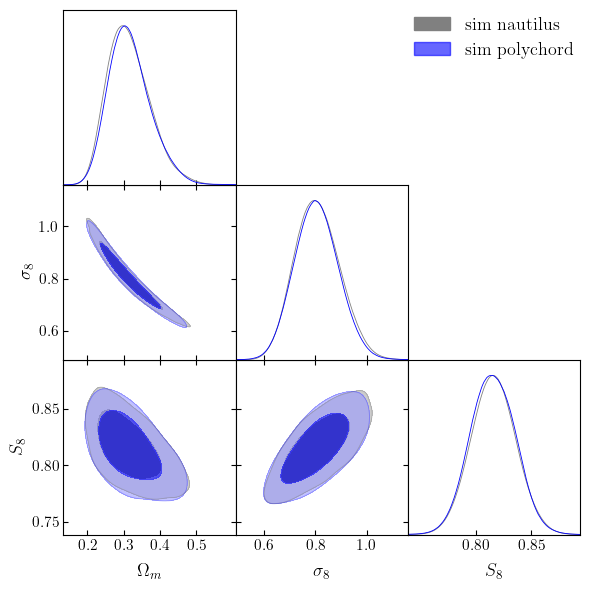

In [34]:
g = plots.get_subplot_plotter(width_inch=6)
g.settings.figure_legend_frame = False
g.settings.alpha_filled_add=0.6
g.settings.axes_fontsize=14
g.settings.axes_labelsize=16
g.settings.legend_fontsize=16
g.settings.line_labels = True


g.triangle_plot([fid_0, fid_3],
                ['omegam','sigma8', 'S8'], 
                filled=[True],
                alpha=[0.2],
                legend_labels=["sim nautilus", "sim polychord"], 
                legend_loc='upper right',  
                contour_colors=['gray', 'b', 'r'] )


print('sim nautilus', fid_0.getInlineLatex('S8',limit=1))
print('sim polychord', fid_3.getInlineLatex('S8',limit=1))

sim halofit S_8 = 0.816\pm 0.020
sim hmcode S_8 = 0.829\pm 0.022


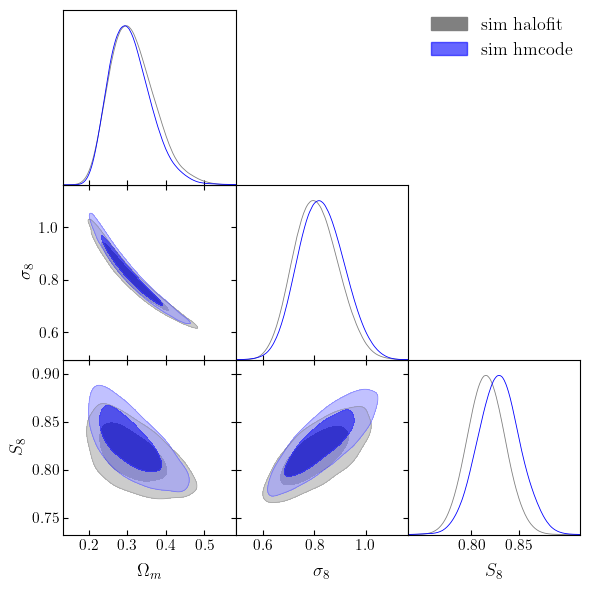

In [35]:
g = plots.get_subplot_plotter(width_inch=6)
g.settings.figure_legend_frame = False
g.settings.alpha_filled_add=0.6
g.settings.axes_fontsize=14
g.settings.axes_labelsize=16
g.settings.legend_fontsize=16
g.settings.line_labels = True


g.triangle_plot([fid_0, fid_4],
                ['omegam','sigma8', 'S8'], 
                filled=[True],
                alpha=[0.2],
                legend_labels=["sim halofit", "sim hmcode"], 
                legend_loc='upper right',  
                contour_colors=['gray', 'b', 'r'] )

print('sim halofit', fid_0.getInlineLatex('S8',limit=1))
print('sim hmcode', fid_4.getInlineLatex('S8',limit=1))

sim old cov S_8 = 0.815\pm 0.022
sim new cov S_8 = 0.816\pm 0.020


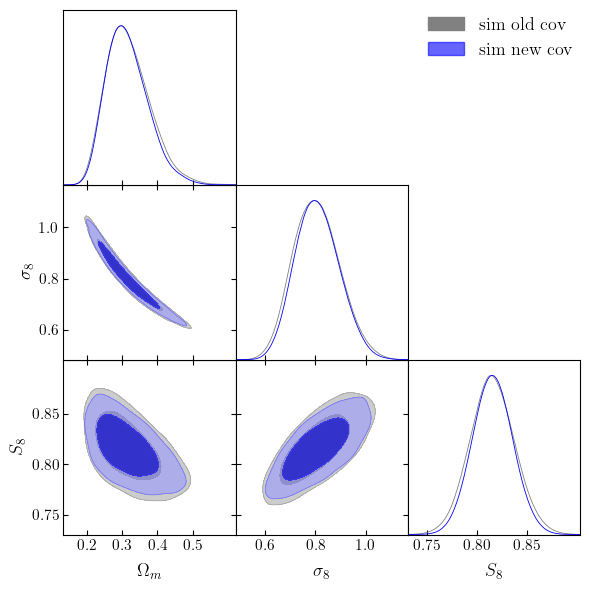

In [28]:
g = plots.get_subplot_plotter(width_inch=6)
g.settings.figure_legend_frame = False
g.settings.alpha_filled_add=0.6
g.settings.axes_fontsize=14
g.settings.axes_labelsize=16
g.settings.legend_fontsize=16
g.settings.line_labels = True


g.triangle_plot([fid_5, fid_0],
                ['omegam','sigma8', 'S8'], 
                filled=[True],
                alpha=[0.2],
                legend_labels=["sim old cov", "sim new cov"], 
                legend_loc='upper right',  
                contour_colors=['gray', 'b', 'r'] )

print('sim old cov', fid_5.getInlineLatex('S8',limit=1))
print('sim new cov', fid_0.getInlineLatex('S8',limit=1))

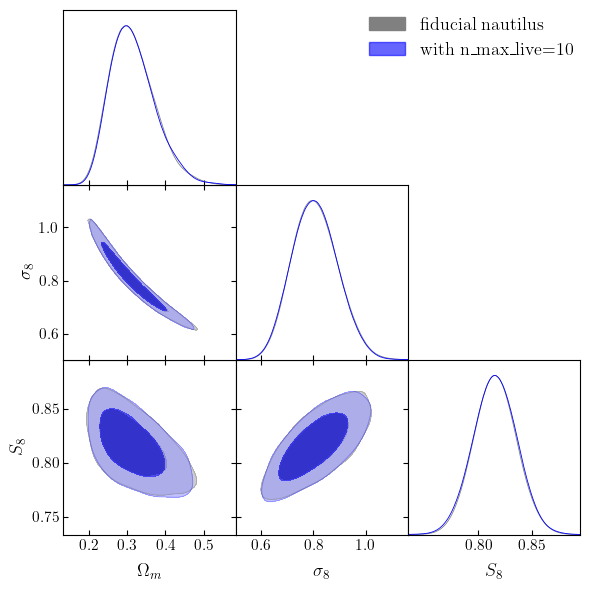

In [6]:
g = plots.get_subplot_plotter(width_inch=6)
g.settings.figure_legend_frame = False
g.settings.alpha_filled_add=0.6
g.settings.axes_fontsize=14
g.settings.axes_labelsize=16
g.settings.legend_fontsize=16
g.settings.line_labels = True


g.triangle_plot([fid_0, fid_6],
                ['omegam','sigma8', 'S8'], 
                filled=[True],
                alpha=[0.2],
                legend_labels=["fiducial nautilus", "with n_max_live=10"], 
                legend_loc='upper right',  
                contour_colors=['gray', 'b', 'r'] )

fiducial S_8 = 0.816\pm 0.020
no large scales S_8 = 0.816\pm 0.020


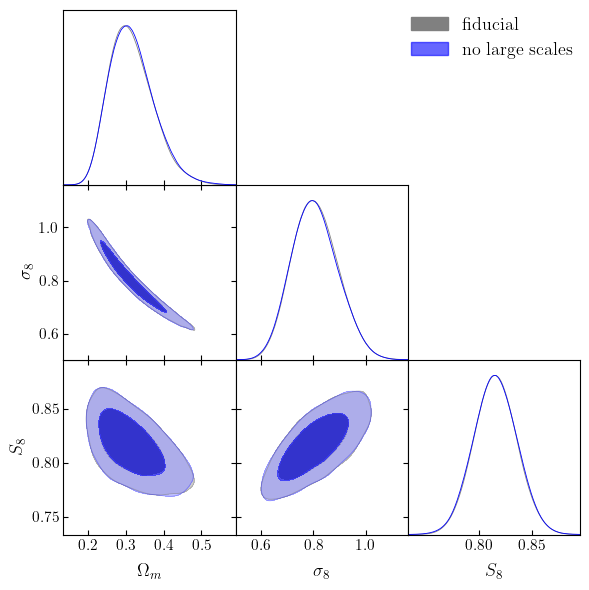

In [40]:
g = plots.get_subplot_plotter(width_inch=6)
g.settings.figure_legend_frame = False
g.settings.alpha_filled_add=0.6
g.settings.axes_fontsize=14
g.settings.axes_labelsize=16
g.settings.legend_fontsize=16
g.settings.line_labels = True


g.triangle_plot([fid_0, fid_7],
                ['omegam','sigma8', 'S8'], 
                filled=[True],
                alpha=[0.2],
                legend_labels=["fiducial", "no large scales"], 
                legend_loc='upper right',  
                contour_colors=['gray', 'b', 'r'] )

print('fiducial', fid_0.getInlineLatex('S8',limit=1))
print('no large scales', fid_7.getInlineLatex('S8',limit=1))

fiducial sim S_8 = 0.816\pm 0.020
fiducial data, blind S_8 = 0.831\pm 0.021


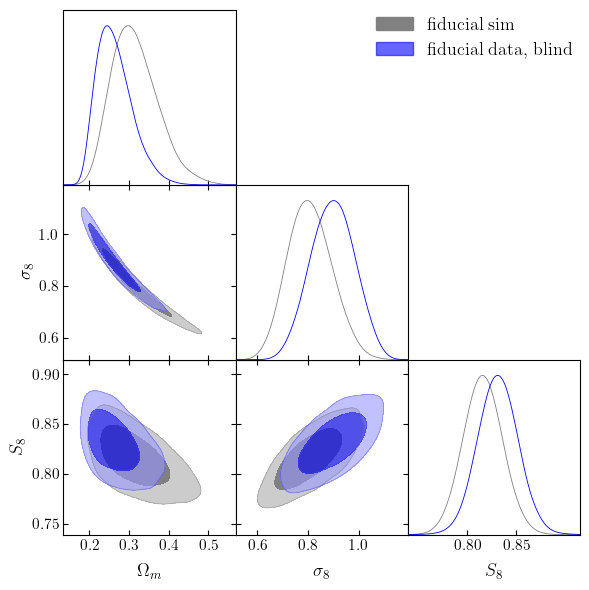

In [41]:
g = plots.get_subplot_plotter(width_inch=6)
g.settings.figure_legend_frame = False
g.settings.alpha_filled_add=0.6
g.settings.axes_fontsize=14
g.settings.axes_labelsize=16
g.settings.legend_fontsize=16
g.settings.line_labels = True


g.triangle_plot([fid_0, fid_1],
                ['omegam','sigma8', 'S8'], 
                filled=[True],
                alpha=[0.2],
                legend_labels=["fiducial sim", "fiducial data, blind"], 
                legend_loc='upper right',  
                contour_colors=['gray', 'b', 'r'] )

print('fiducial sim', fid_0.getInlineLatex('S8',limit=1))
print('fiducial data, blind', fid_1.getInlineLatex('S8',limit=1))

(0.5, 1.0)

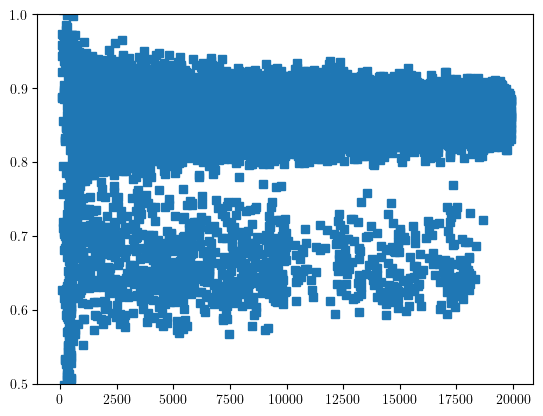

In [8]:
plt.plot(c_1[:,16]*np.sqrt(c_1[:,0]/0.3), lw=0, marker='s')
plt.ylim(0.5, 1)

Removed no burn in


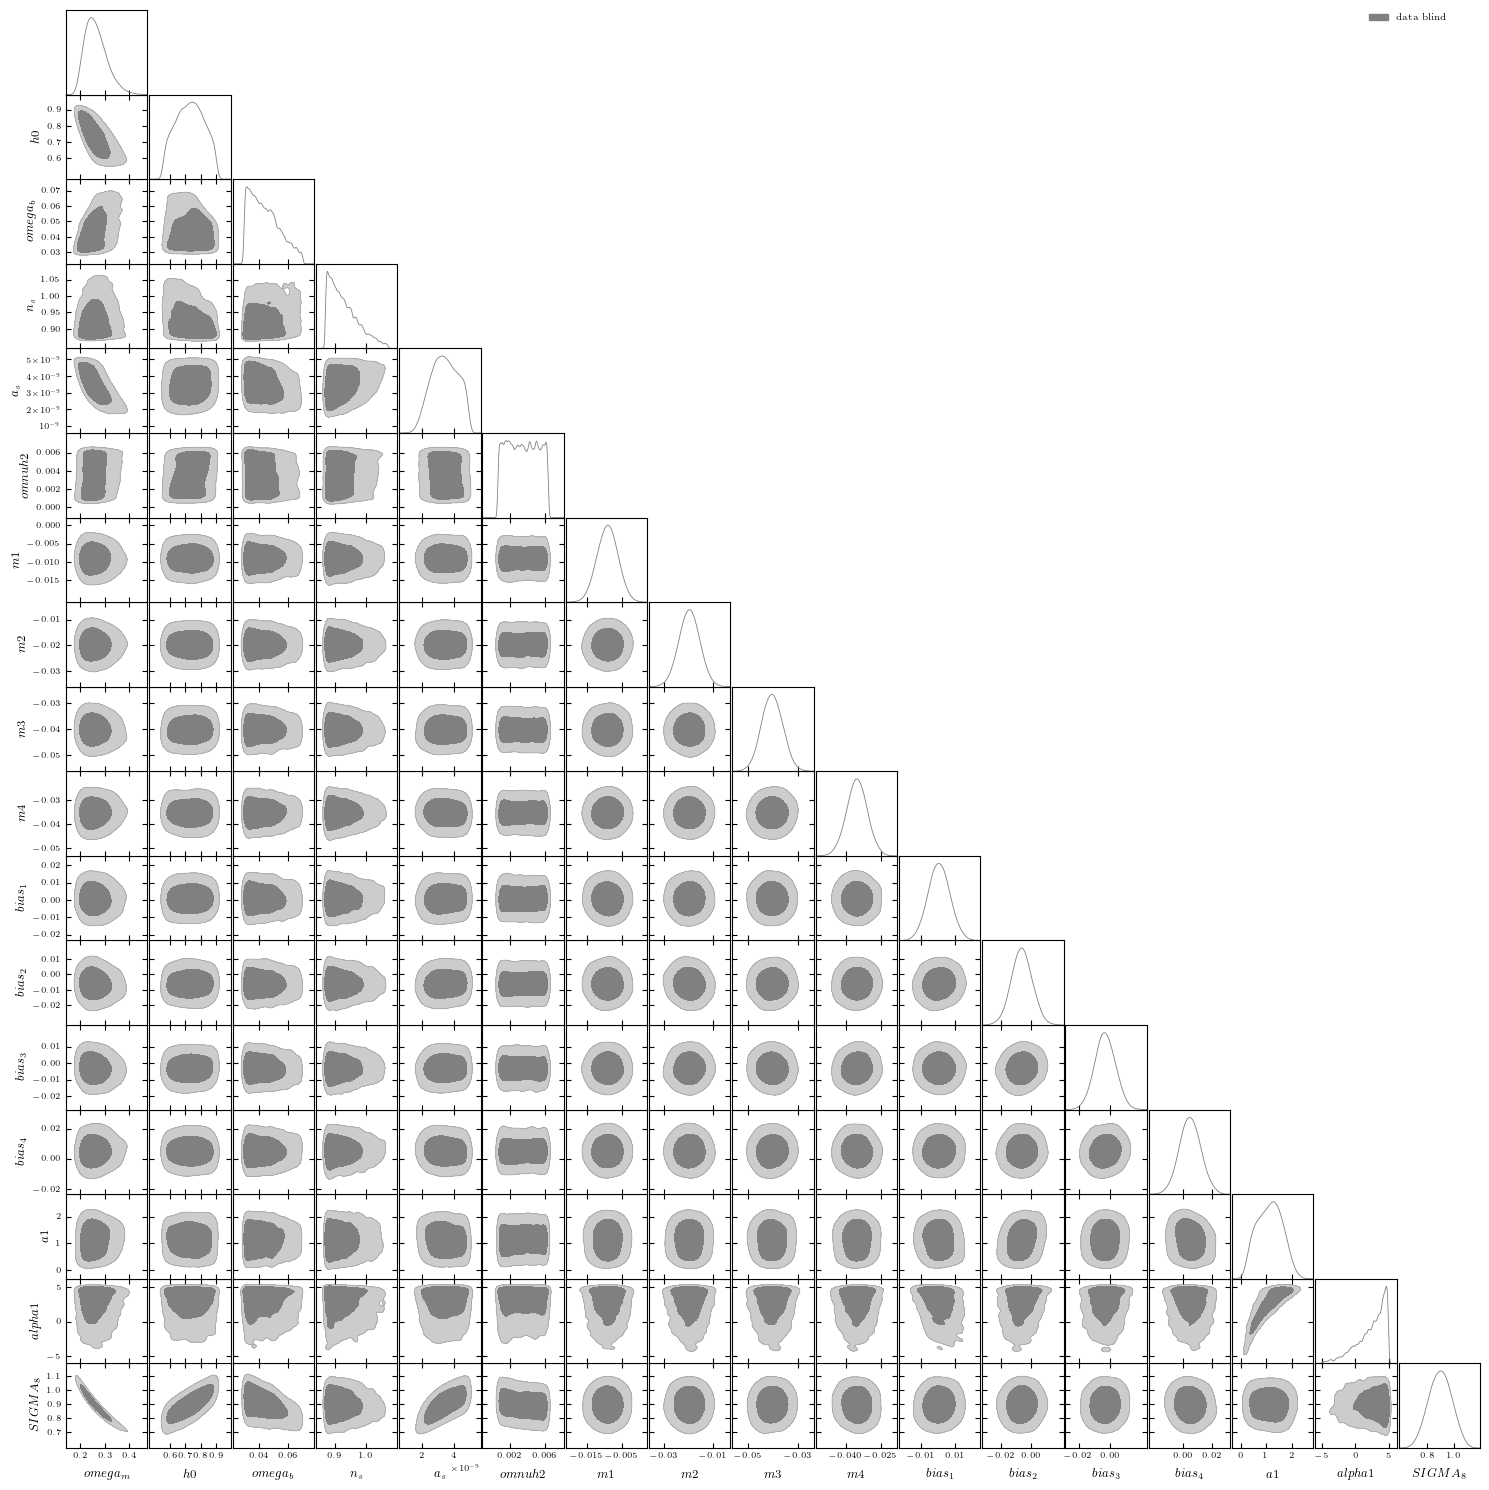

In [42]:
fid_1 = MCSamples(samples = np.c_[c_1[:,0], c_1[:,1], c_1[:,2], c_1[:,3], c_1[:,4], c_1[:,5], c_1[:,6], c_1[:,7], c_1[:,8]
                  , c_1[:,9], c_1[:,10], c_1[:,11], c_1[:,12], c_1[:,13], c_1[:,14], c_1[:,15], c_1[:,16]],
                weights = np.exp(c_1[:,19]),
                names   = name_1[:17],
                labels  = name_1[:17],
                label   = "delve")

g = plots.get_subplot_plotter(width_inch=15)
g.settings.figure_legend_frame = False
g.settings.alpha_filled_add=0.6
# g.settings.axes_fontsize=14
# g.settings.axes_labelsize=16
# g.settings.legend_fontsize=16
g.settings.line_labels = True


g.triangle_plot([fid_1],
                name_1[:17], 
                filled=[True],
                alpha=[0.2],
                legend_labels=["data blind"], 
                legend_loc='upper right',  
                contour_colors=['gray', 'b'] )



Removed no burn in


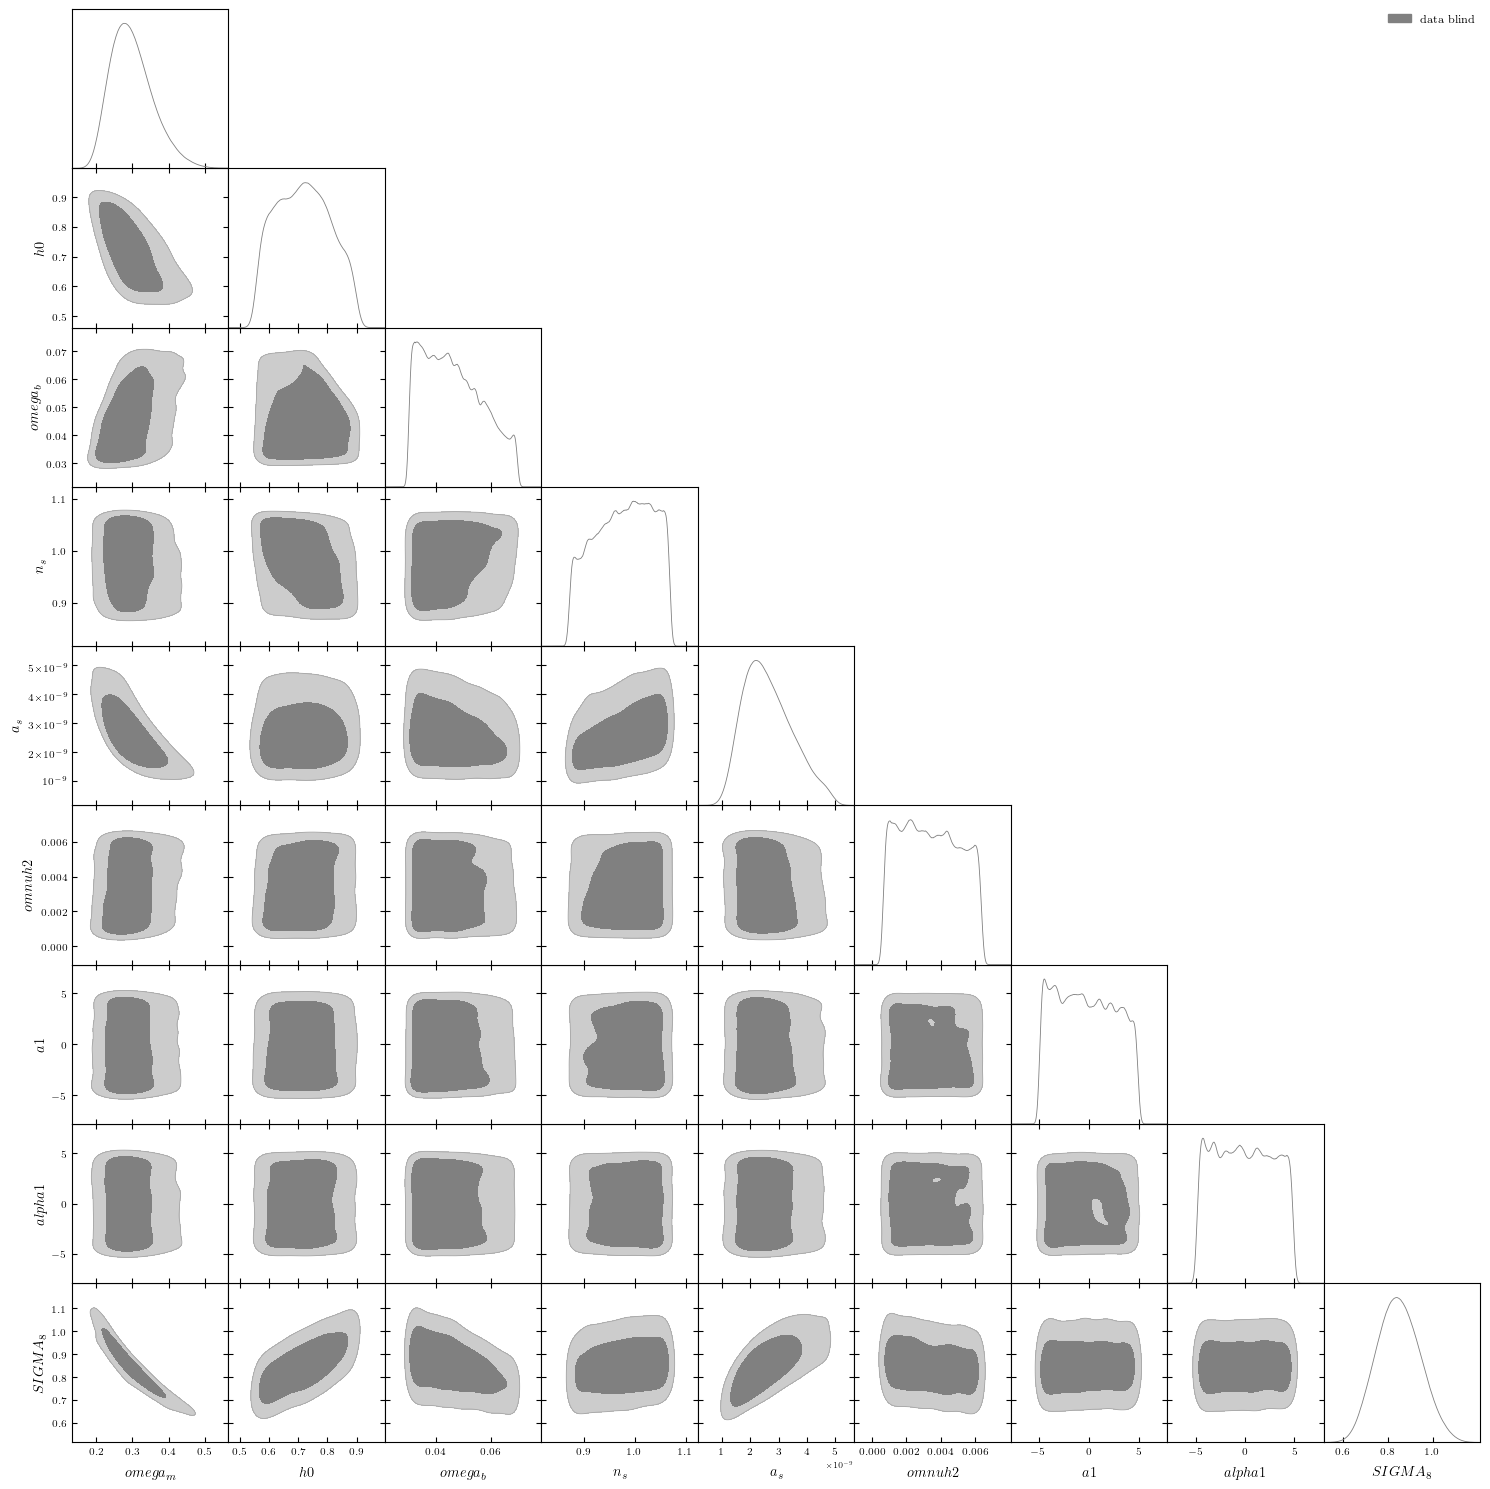

In [56]:

fid_0 = MCSamples(samples = np.c_[c_0[:,0], c_0[:,1], c_0[:,2], c_0[:,3], c_0[:,4], c_0[:,5], c_0[:,6], c_0[:,7], c_0[:,8]],
                weights = np.exp(c_0[:,11]),
                names   = name_0[:9],
                labels  = name_0[:9],
                label   = "delve")

g = plots.get_subplot_plotter(width_inch=15)
g.settings.figure_legend_frame = False
g.settings.alpha_filled_add=0.6
# g.settings.axes_fontsize=14
# g.settings.axes_labelsize=16
# g.settings.legend_fontsize=16
g.settings.line_labels = True


g.triangle_plot([fid_0],
                name_0[:9], 
                filled=[True],
                alpha=[0.2],
                legend_labels=["data blind"], 
                legend_loc='upper right',  
                contour_colors=['gray', 'b'] )


## Scale cut chains

In [ ]:
chain_dir = '/project/chihway/chihway/CosmicShearCosmosis/analysis/delve-campaign/'

c_0, n_0, name_0 = load_chain_info(chain_dir+'fiducial-cuts.txt')
c_1, n_1, name_1 = load_chain_info(chain_dir+'baryon-contam-fiducial-cuts.txt')

In [ ]:
fid_0 = MCSamples(samples = np.c_[c_0[:,0],c_0[:,8], c_0[:,8]*np.sqrt(c_0[:,0]/0.3)],
                weights = np.exp(c_0[:,11]),
                names   = ['omegam', 'sigma8', 'S8'],
                labels  = ['\Omega_{m}','\sigma_8','S_8'],
                label   = "fiducial")

fid_1 = MCSamples(samples = np.c_[c_1[:,0],c_1[:,8], c_1[:,8]*np.sqrt(c_1[:,0]/0.3)],
                weights = np.exp(c_1[:,11]),
                names   = ['omegam', 'sigma8', 'S8'],
                labels  = ['\Omega_{m}','\sigma_8','S_8'],
                label   = "baryon contamination")

g = plots.get_subplot_plotter(width_inch=4)
g.settings.figure_legend_frame = False
g.settings.alpha_filled_add=0.6
g.settings.axes_fontsize=14
g.settings.axes_labelsize=16
g.settings.legend_fontsize=16
g.settings.line_labels = True


g.triangle_plot([fid_0, fid_1],
                ['omegam','sigma8', 'S8'], 
                filled=[True],
                alpha=[0.2],
                legend_labels=["fiducial", "contaminated"], 
                legend_loc='upper right',  
                contour_colors=['gray', 'b'] )

